## КМ5

На занятиях рассматривались классы Card – игральная карта и Deck – карточная колода Мы
играем с пятью колодами. Десять тысяч раз из каждой колоды случайным образом сдаем по
карте. Определить частоту того, что будут сданы, две, три, четыре, пять карт одного
старшинства, например, пять дам или четыре туза.

{2: 6411, 3: 947, 4: 58, 5: 3}


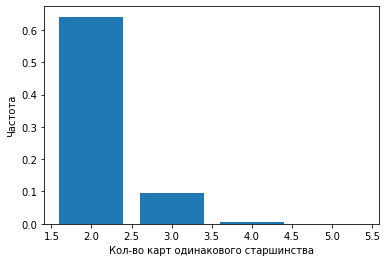

In [1]:
import random
import matplotlib.pyplot as plt


def same_ranks(L):
    n = 1
    for i in set(L):
        if L.count(i) > n:
            n = L.count(i)
    return n


class Card:

    ranks = ('6', '7', '8', '9', '10', 'В', 'Д', 'К', 'Т')
    suits = ('\u2660', '\u2663', '\u2666', '\u2665')
    mes = 'Неккоректное старшинство и/или масть карты: ({}, {})'
    value_ranks = {'6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'В': 11, 'Д': 12, 'К': 13, 'Т': 14}
    
    def __init__(self, rank, suit):
        if (rank not in self.ranks) or (suit not in self.suits):
            raise ValueError(Card.mes.format(rank, suit))
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f'{self.rank}{self.suit}'

    def __str__(self):
        return f'{self.rank}{self.suit}'


class Deck:

    def __init__(self):
        self.deck = [Card(rank, suit) for rank in Card.ranks for suit in Card.suits]

    def __len__(self):
        return len(self.deck)

    def shuffle(self):
        random.shuffle(self.deck)

    def __repr__(self):
        return ' | '.join(map(str, self.deck))

    def __str__(self):
        return self.__repr__()

    def deal(self, n):
        l = len(self)
        if n <= l:
            dealed = self.deck[:n]
            self.deck = self.deck[n:]
            return dealed
        else:
            raise ValueError(f'Нельзя сдать {n} из колоды с {l} картами')


class Game:

    def __init__(self, n=5, m=10000):
        self.n = n
        self.m = m

    def dist_cards(self, *args):
        D = {i:0 for i in args}
        for _ in range(self.m):
            deck_list = [Deck() for _ in range(self.n)]
            card_list = []
            for deck in deck_list:
                deck.shuffle()
                card_list += deck.deal(1)
            rank_list = [Card.value_ranks[card.rank] for card in card_list]
            card_count = same_ranks(rank_list)
            if card_count in D.keys():
                D[card_count] += 1
        print(D)
        for key in D:
            D[key] /= self.m
        return D

    def view(self, *args):
        D = self.dist_cards(*args)
        plt.bar(D.keys(), D.values())
        plt.xlabel('Кол-во карт одинакового старшинства')
        plt.ylabel('Частота')
        plt.show()


game = Game()
game.view(2, 3, 4, 5)